In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
%run -i ./ownlib/PHT-Library.ipynb

In [7]:
# Import images
ori_img = cv2.imread('./assets/lena.png', 0)
ori_logo = cv2.imread('./assets/squares.png', 0)

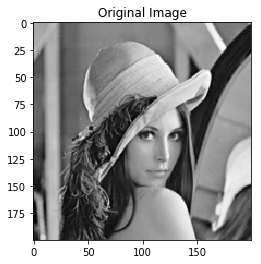

In [8]:
N = 200 # Image Size
G = 20 # Watermark Size

P = 2 * G
T_STEP = int(P / 4) + 1
I_STEP = int(N / 8) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Show Image and Logo
imshow(IMG, 'Original Image')

Progress: [####################] 100.0%


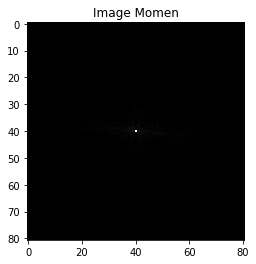

In [9]:
# Calculate Momen of Original Image
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

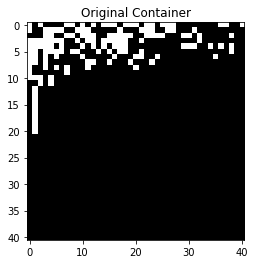

In [17]:
DELTA = 0.5 # Watermarking Power

P2 = P * 2 + 1

# Current Binary Value
MAT_Q = np.floor(np.abs(MOMEN) / DELTA) % 2
CONTAINER = MAT_Q[P:P2,P:P2]

# Show Container
imshow(CONTAINER, 'Original Container')

In [33]:
def processAttack(IMG_MODIFIED, SIZE=N):
    
    # Calculate Momen
    MOMEN_MODIFIED = transformPHT(IMG_MODIFIED, SIZE, P)
    
    # Current Binary Value & Difference
    MAT_Q_MODIFIED = np.floor(np.abs(MOMEN_MODIFIED) / DELTA) % 2
    CONTAINER_MODIFIED = MAT_Q_MODIFIED[P:P2,P:P2]
    C_DIFF = (CONTAINER != CONTAINER_MODIFIED) * 1
    
    # Calculate Bit Error Rate    
    BE = np.sum(C_DIFF)
    BER = BE / ((2 * G + 1) * (2 * G + 1))
    
    return (C_DIFF, BE, BER)

Progress: [####################] 100.0%


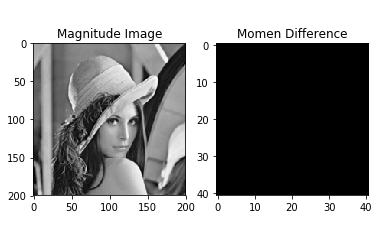

BE  :  0
BER :  0.00%


In [34]:
# Attack: Change Complex into Real Number
IMG_REAL = np.abs(IMG)

(C_DIFF_REAL, BE_REAL, BER_REAL) = processAttack(IMG_REAL)

# Show Container
imshow2(IMG_REAL, C_DIFF_REAL, 'Magnitude Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_REAL)
print('BER : ', '{:.2%}'.format(BER_REAL))

Progress: [####################] 100.0%


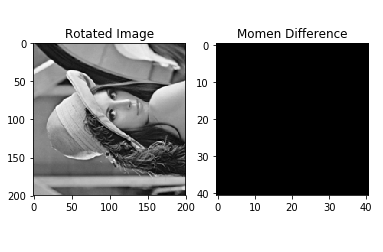

BE  :  0
BER :  0.00%


In [35]:
# Attack: Rotation 90 degree
IMG_ROTATE = np.rot90(IMG)

(C_DIFF_ROTATE, BE_ROTATE, BER_ROTATE) = processAttack(IMG_ROTATE)

# Show Container
imshow2(IMG_ROTATE, C_DIFF_ROTATE, 'Rotated Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_ROTATE)
print('BER : ', '{:.2%}'.format(BER_ROTATE))

Progress: [####################] 100.0%


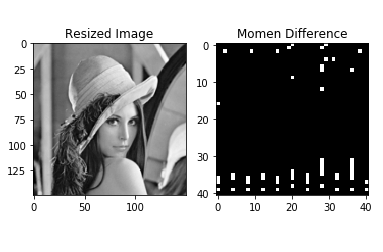

BE  :  57
BER :  3.39%


In [36]:
# Attack: Resize 75%
NN = 150
IMG_RESIZE = cv2.resize(np.abs(IMG), (150, 150))

(C_DIFF_RESIZE, BE_RESIZE, BER_RESIZE) = processAttack(IMG_RESIZE, NN)

# Show Container
imshow2(IMG_RESIZE, C_DIFF_RESIZE, 'Resized Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_RESIZE)
print('BER : ', '{:.2%}'.format(BER_RESIZE))

Progress: [####################] 100.0%


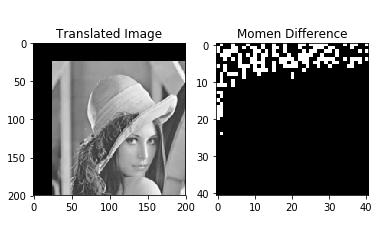

BE  :  165
BER :  9.82%


In [37]:
# Attack: Translation 12.5% X 12.5% Y
IMG_TRANSLATION = np.zeros((N,N), dtype='complex128')
IMG_TRANSLATION[25:200, 25:200] = IMG[0:175, 0:175]

(C_DIFF_TRANSLATION, BE_TRANSLATION, BER_TRANSLATION) = processAttack(IMG_TRANSLATION)

# Show Container
imshow2(IMG_TRANSLATION, C_DIFF_TRANSLATION, 'Translated Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_TRANSLATION)
print('BER : ', '{:.2%}'.format(BER_TRANSLATION))

Progress: [####################] 100.0%


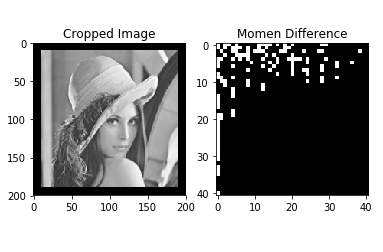

BE  :  124
BER :  7.38%


In [38]:
# Attack: FRAME 5%
IMG_CROP = np.copy(IMG)
IMG_CROP[0:10,:] = 0
IMG_CROP[:,0:10] = 0
IMG_CROP[190:200,:] = 0
IMG_CROP[:,190:200] = 0

(C_DIFF_CROP, BE_CROP, BER_CROP) = processAttack(IMG_CROP)

# Show Container
imshow2(IMG_CROP, C_DIFF_CROP, 'Cropped Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_CROP)
print('BER : ', '{:.2%}'.format(BER_CROP))

Progress: [####################] 100.0%


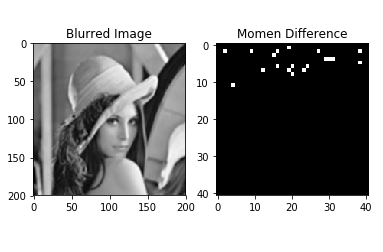

BE  :  19
BER :  1.13%


In [40]:
# Attack: BLUR 3x3
IMG_BLUR = cv2.blur(np.abs(IMG), (3,3))

(C_DIFF_BLUR, BE_BLUR, BER_BLUR) = processAttack(IMG_BLUR)

# Show Container
imshow2(IMG_BLUR, C_DIFF_BLUR, 'Blurred Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_BLUR)
print('BER : ', '{:.2%}'.format(BER_BLUR))

Progress: [####################] 100.0%


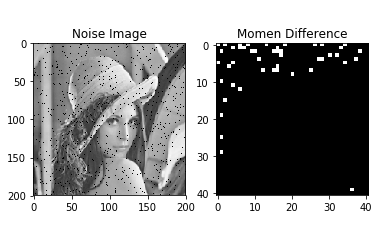

BE  :  46
BER :  2.74%


In [41]:
# Attack: RANDOM NOISE 3%
IMG_NOISE = np.copy(IMG)
for i, row in enumerate(IMG_NOISE):
    for j, val in enumerate(row):
        if(np.random.randint(low=0, high=100) < 3):
            IMG_NOISE[i,j] = 0

(C_DIFF_NOISE, BE_NOISE, BER_NOISE) = processAttack(IMG_NOISE)

# Show Container
imshow2(IMG_NOISE, C_DIFF_NOISE, 'Noise Image', 'Momen Difference')

# Show Bit Error Rate
print('BE  : ', BE_NOISE)
print('BER : ', '{:.2%}'.format(BER_NOISE))